<a href="https://colab.research.google.com/github/apo010/ML-Workshop/blob/main/data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
#gerekli kütüphaneler eklendi.

In [ ]:
df=pd.read_excel("veriseti.xlsx")
df
#veri seti içe aktarıldı ve ham hali ekrana yazdırıldı.

,ulke,kadin_okuryazar,erkek_okuryazar,egitim_harcamalari (m),QS_World_University_Rankings
0,turkiye2020,94.52%,99.1%,"29,057.2",9
1,yunanistan2020,NaN,NaN,"8,500.5",6
2,guney_afrika2020,89.37%,90.68%,"24,024.3",8
3,lubnan2020,NaN,NaN,417.1,7
4,suudi_arabistan2020,96.05%,98.62%,"57,341.5",7
5,turkiye2019,94.42%,99.08%,"33,847.7",10
6,yunanistan2019,97.39%,98.51%,"7,360.6",6
7,guney_afrika2019,94.53%,97.39%,"23,957.3",9
8,lubnan2019,NaN,NaN,"1,324.1",6
9,suudi_arabistan2019,96.02%,98.52%,"56,978.3",8


In [ ]:
df.isnull().sum()
#veri setindeki boş hücrelerin sayısı ekrana yazdırıldı.

,0
ulke,0
kadin_okuryazar,8
erkek_okuryazar,8
egitim_harcamalari (m),0
QS_World_University_Rankings,0


In [ ]:
df.dropna(inplace=True)
#veri setindeki boş hücreler silindi, bizim burada belirlediğimiz strateji boş hücrelerin silinmesiydi.

In [ ]:
df
#veri setindeki boş hücreler silindikten sonra eksiksiz hali ekrana yazdırıldı.

,ulke,kadin_okuryazar,erkek_okuryazar,egitim_harcamalari (m),QS_World_University_Rankings
0,turkiye2020,94.52%,99.1%,"29,057.2",9
2,guney_afrika2020,89.37%,90.68%,"24,024.3",8
4,suudi_arabistan2020,96.05%,98.62%,"57,341.5",7
5,turkiye2019,94.42%,99.08%,"33,847.7",10
6,yunanistan2019,97.39%,98.51%,"7,360.6",6
7,guney_afrika2019,94.53%,97.39%,"23,957.3",9
9,suudi_arabistan2019,96.02%,98.52%,"56,978.3",8
10,turkiye2018,93.66%,98.96%,"33,474.8",11
11,yunanistan2018,97.30%,98.47%,"7,628.1",6
14,suudi_arabistan2018,92.76%,97.13%,"59,987.3",7


In [ ]:
from sklearn.preprocessing import MinMaxScaler

df['kadin_okuryazar'] = df['kadin_okuryazar'].astype(str).str.replace('%', '').astype(float) / 100
df['erkek_okuryazar'] = df['erkek_okuryazar'].astype(str).str.replace('%', '').astype(float) / 100
df['egitim_harcamalari (m)'] = df['egitim_harcamalari (m)'].replace({',': '', 'M': ''}, regex=True).astype(float)

scaler = MinMaxScaler()
df[['kadin_okuryazar', 'erkek_okuryazar']] = scaler.fit_transform(df[['kadin_okuryazar', 'erkek_okuryazar']])

print(df[['kadin_okuryazar', 'erkek_okuryazar']])
#yüzde sembolleri kaldırılarak sayılar ondalık sayıya çevrildi, daha sonra veriler ölçeklendirildi.

    kadin_okuryazar  erkek_okuryazar
0          0.737420         1.000000
2          0.266240         0.262697
4          0.877402         0.957968
5          0.728271         0.998249
6          1.000000         0.948336
7          0.738335         0.850263
9          0.874657         0.949212
10         0.658737         0.987741
11         0.991766         0.944834
14         0.576395         0.827496
15         0.644099         0.975482
16         0.901189         0.931699
17         0.000000         0.000000
19         0.571821         0.824869
20         0.649588         0.971979
22         0.449222         0.774956
24         0.449222         0.774956


In [ ]:
df.info()
#veri setinin genel bilgileri info() fonksiyonuyla ekrana yazdırıldı

<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, 0 to 24
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ulke                          17 non-null     object 
 1   kadin_okuryazar               17 non-null     float64
 2   erkek_okuryazar               17 non-null     float64
 3   egitim_harcamalari (m)        17 non-null     float64
 4   QS_World_University_Rankings  17 non-null     int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 816.0+ bytes


In [ ]:
df.head()
#veri setinin ilk 5 maddesi head() fonksiyonuyla ekrana yazdırıldı

,ulke,kadin_okuryazar,erkek_okuryazar,egitim_harcamalari (m),QS_World_University_Rankings
0,turkiye2020,0.737420,1.000000,29057.2,9
2,guney_afrika2020,0.266240,0.262697,24024.3,8
4,suudi_arabistan2020,0.877402,0.957968,57341.5,7
5,turkiye2019,0.728271,0.998249,33847.7,10
6,yunanistan2019,1.000000,0.948336,7360.6,6


In [ ]:
df.describe()
#veri setinin minimum, maksimum değerleri, kartilleri gibi bilgiler describe() fonksiyonuyla ekrana yazdırıldı

,kadin_okuryazar,erkek_okuryazar,egitim_harcamalari (m),QS_World_University_Rankings
count,17.000000,17.000000,17.000000,17.000000
mean,0.653786,0.822396,33469.500000,7.941176
std,0.260762,0.274748,18863.570023,1.638238
min,0.000000,0.000000,6948.800000,6.000000
25%,0.571821,0.824869,18875.700000,7.000000
50%,0.658737,0.944834,33474.800000,7.000000
75%,0.874657,0.971979,56679.700000,9.000000
max,1.000000,1.000000,59987.300000,11.000000


In [ ]:
df.duplicated().sum()
#tekrarlayan değerlerin toplam sayısı duplicated().sum() fonksiyonuyla ekrana yazdırıldı

0

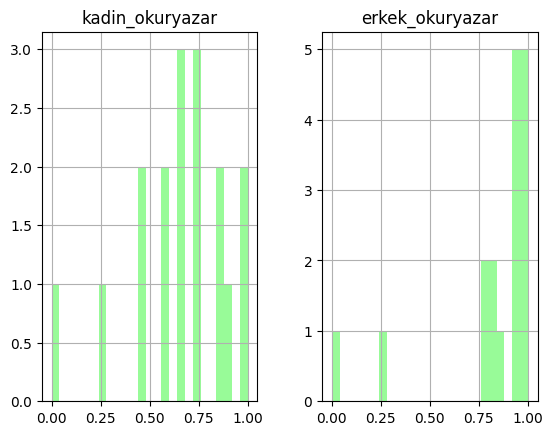

In [ ]:
import matplotlib.pyplot as plt
df[['kadin_okuryazar', 'erkek_okuryazar']].hist(bins=25, color='palegreen')
plt.show()
#veri seti ölçeklendirildikten sonra kadın ve erkek okuryazar oranı
#gerekli kütüphanenin eklenmesi sayesinde görselleştirildi

In [ ]:
import seaborn as sns
sns.distributions

<module 'seaborn.distributions' from '/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py'>

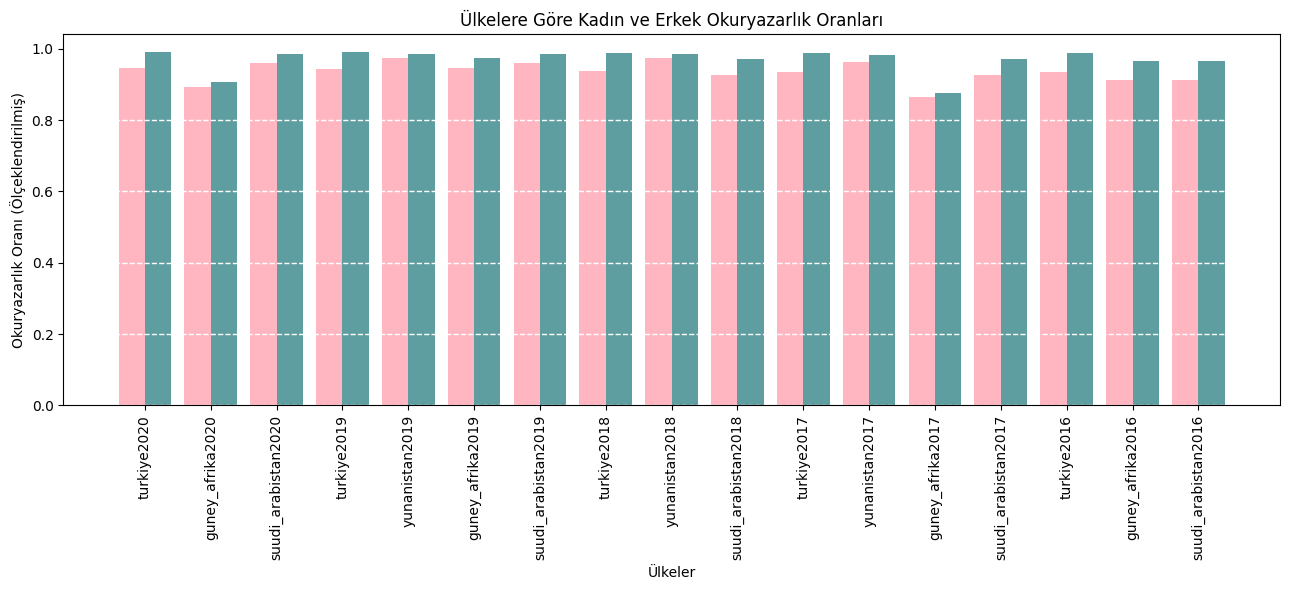

In [ ]:
plt.figure(figsize=(13, 6))
X_axis = np.arange(len(df['ulke']))
plt.bar(X_axis - 0.2, df['kadin_okuryazar'], 0.4, label='Kadın Okuryazarlık Oranı', color='lightpink')
plt.bar(X_axis + 0.2, df['erkek_okuryazar'], 0.4, label='Erkek Okuryazarlık Oranı', color='cadetblue')

for y in [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]:
    plt.axhline(y=y, color='white', linestyle='--', linewidth=1)

plt.xticks(X_axis, df['ulke'], rotation=90)
plt.xlabel("Ülkeler")
plt.ylabel("Okuryazarlık Oranı (Ölçeklendirilmiş)")
plt.title("Ülkelere Göre Kadın ve Erkek Okuryazarlık Oranları")
plt.tight_layout()
plt.show()
#her ülkenin kadın ve erkeklerinin okuryazarlık oranlarının ilgili yıldaki farkı rahat anlaşılması için sütun grafiği olarak görselleştirilmiştir.

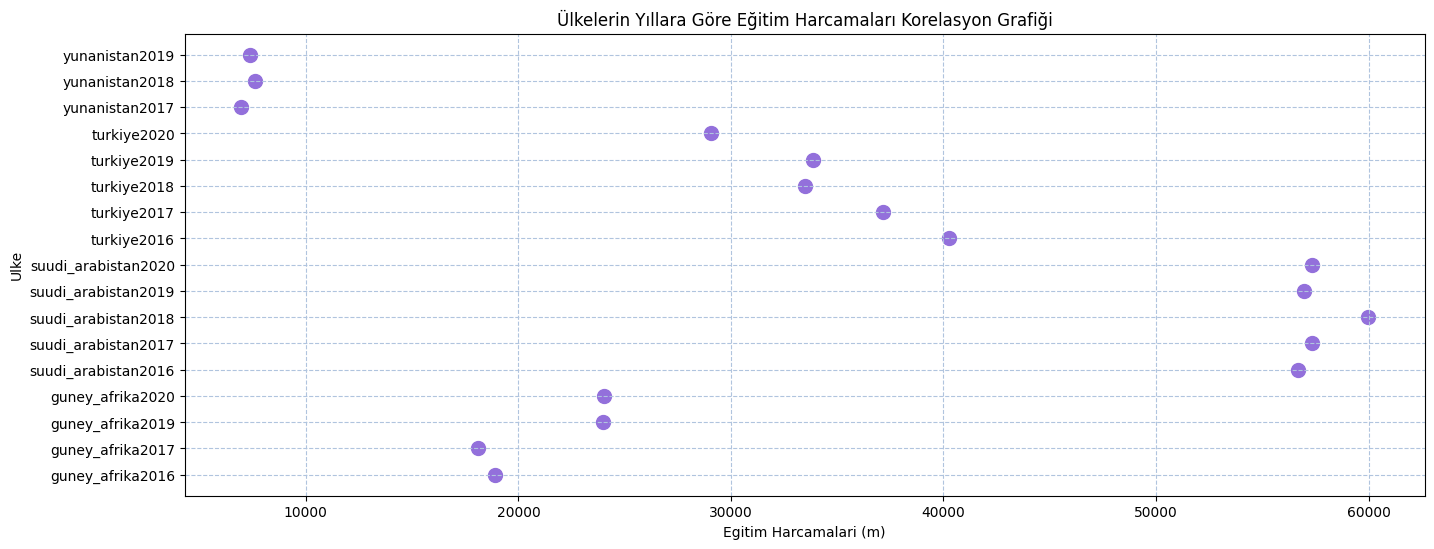

In [ ]:
df_sorted = df.sort_values(by='ulke', ascending=True)
plt.figure(figsize=(16, 6))
plt.scatter(df_sorted['egitim_harcamalari (m)'], df_sorted['ulke'], s=100, color='mediumpurple')
plt.xlabel('Egitim Harcamalari (m)')
plt.ylabel('Ulke')
plt.title('Ülkelerin Yıllara Göre Eğitim Harcamaları Korelasyon Grafiği')
plt.grid(True, color='lightsteelblue', linestyle='--')
plt.show()
#her ülkenin yıllara göre eğitime yaptıkları harcamaların dağılımı görselleştirildi.

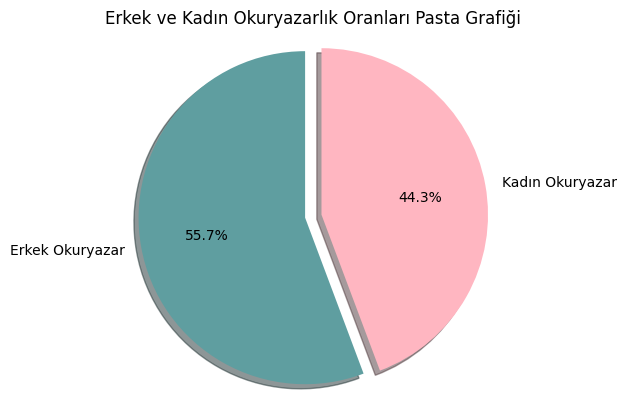

In [ ]:
erkek_okuryazar = df['erkek_okuryazar']
kadin_okuryazar = df['kadin_okuryazar']
labels = ['Erkek Okuryazar', 'Kadın Okuryazar']
sizes = [erkek_okuryazar.sum(), kadin_okuryazar.sum()]
colors = ['cadetblue', 'lightpink']
explode = (0.1, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.title('Erkek ve Kadın Okuryazarlık Oranları Pasta Grafiği')
plt.show()
#kadın ve erkek okuryazar oranının seçilen ülkeler genelinde nasıl bir dağılım gösterdiği görselleştirildi.

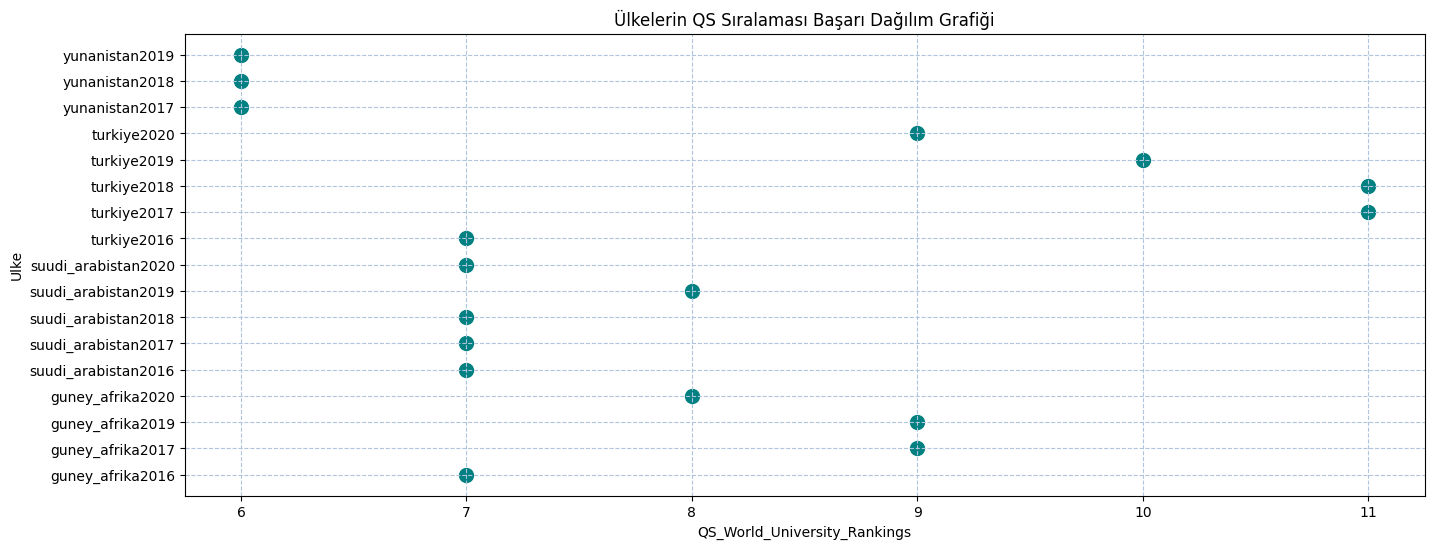

In [ ]:
df_sorted = df.sort_values(by='ulke', ascending=True)
plt.figure(figsize=(16, 6))
plt.scatter(df_sorted['QS_World_University_Rankings'], df_sorted['ulke'], s=100, color='teal')
plt.xlabel('QS_World_University_Rankings')
plt.ylabel('Ulke')
plt.title('Ülkelerin QS Sıralaması Başarı Dağılım Grafiği')
plt.grid(True, color='lightsteelblue', linestyle='--')
plt.show()
#yıllara göre sıralanan ülkelerin, QS World University Rankings sıralamasına giren üniversitelerinin sayısı görselleştirildi.

In [ ]:
df

,ulke,kadin_okuryazar,erkek_okuryazar,egitim_harcamalari (m),QS_World_University_Rankings
0,turkiye2020,0.737420,1.000000,29057.2,9
2,guney_afrika2020,0.266240,0.262697,24024.3,8
4,suudi_arabistan2020,0.877402,0.957968,57341.5,7
5,turkiye2019,0.728271,0.998249,33847.7,10
6,yunanistan2019,1.000000,0.948336,7360.6,6
7,guney_afrika2019,0.738335,0.850263,23957.3,9
9,suudi_arabistan2019,0.874657,0.949212,56978.3,8
10,turkiye2018,0.658737,0.987741,33474.8,11
11,yunanistan2018,0.991766,0.944834,7628.1,6
14,suudi_arabistan2018,0.576395,0.827496,59987.3,7


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
#gerekli tüm kütüphaneler eklendi.

In [ ]:
df=pd.read_excel("knn.xlsx")
df
#mevcut verisetimiz gerekli verileri içermediği için, ordaki bilgilerden yola çıkılarak yeni veriseti oluşturuldu:
#QS sıralamasında, ülkelerin üniversite sayıları 8'den yüksekse evet, değilse hayır olarak ayarlandı,
#Eğitim ortalamasaında, ülkelerin eğitime yaptıkları yatırım 38660 milyondan fazlaysa evet olarak ayarlandı.
#sonuç sütunu olarak sonuc sütunu eklendi.

,QS_ortalama,Egitim_ortalama,Sonuc
0,Hayır,Hayır,Hayır
1,Hayır,Evet,Hayır
2,Evet,Hayır,Evet
3,Hayır,Hayır,Hayır
4,Evet,Hayır,Evet
5,Hayır,Evet,Hayır
6,Evet,Hayır,Evet
7,Hayır,Hayır,Hayır
8,Hayır,Evet,Hayır
9,Evet,Hayır,Evet


In [ ]:
qs_ortalama={"Hayır":0,"Evet":1}
egitim_ortalama={"Hayır":0,"Evet":1}
sonuc={"Hayır":0,"Evet":1}
df["QS_ortalama"]=df["QS_ortalama"].replace(qs_ortalama)
df["Egitim_ortalama"]=df["Egitim_ortalama"].replace(egitim_ortalama)
df["Sonuc"]=df["Sonuc"].replace(sonuc)
df
#veriler bool veri tipine dönüştürüldü.

<ipython-input-88-e5261d5f545a>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["QS_ortalama"]=df["QS_ortalama"].replace(qs_ortalama)
<ipython-input-88-e5261d5f545a>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Egitim_ortalama"]=df["Egitim_ortalama"].replace(egitim_ortalama)
<ipython-input-88-e5261d5f545a>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behav

,QS_ortalama,Egitim_ortalama,Sonuc
0,0,0,0
1,0,1,0
2,1,0,1
3,0,0,0
4,1,0,1
5,0,1,0
6,1,0,1
7,0,0,0
8,0,1,0
9,1,0,1


In [ ]:
df['QS_ortalama'].unique()

array([0, 1])

In [ ]:
df['Egitim_ortalama'].unique()

array([0, 1])

In [ ]:
X = df[['Egitim_ortalama']]
y = df[['Sonuc']]

#veri seti eğitim ve test kümelerine ayrıldı.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

#knn modeli oluşturuldu.
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

#test kümesi üzerinde tahmin yapıldı.
y_pred = knn_model.predict(X_test)

#model doğruluğu hesaplandı ve yazdırıldı.
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Doğruluğu: {accuracy}")

Model Doğruluğu: 0.8571428571428571


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
knn=KNeighborsClassifier(n_neighbors=3)
#knn modelinin komşu sayısı belirlenmiştir.

In [ ]:
knn.fit(X_train,y_train)
#modelin eğitilmesi başlatılmıştır.

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [ ]:
prediction_knn=knn.predict(X_test)

In [ ]:
print("KNN modelinin tahmin sonuçları: {}".format(prediction_knn))
#tahmin sonuçları yazdırılmıştır.

KNN modelinin tahmin sonuçları: [1 1 0 0 0 1 1]


In [ ]:
a=pd.DataFrame({'Gerçek veriler:':y_test.squeeze(),'Tahmin verileri:':prediction_knn})
a.head(10)
#gerçek ve tahmin verileri yazdırılmıştır.

,Gerçek veriler:,Tahmin verileri:
9,1,1
11,1,1
8,0,0
12,0,0
5,0,0
7,0,1
2,1,1


              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.75      1.00      0.86         3

    accuracy                           0.86         7
   macro avg       0.88      0.88      0.86         7
weighted avg       0.89      0.86      0.86         7



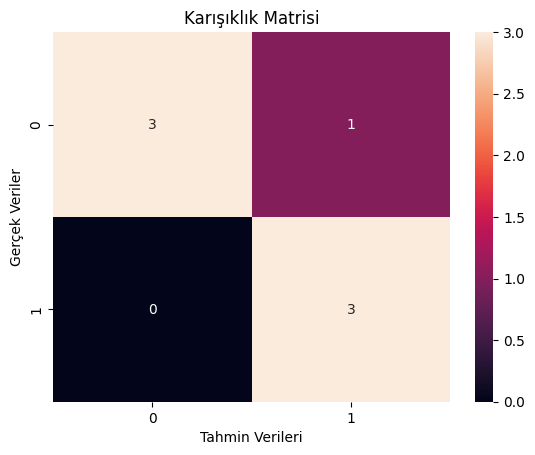

In [ ]:
matrix=confusion_matrix(y_test,prediction_knn)
sns.heatmap(matrix,annot=True,fmt="d")
plt.title('Karışıklık Matrisi')
plt.xlabel('Tahmin Verileri')
plt.ylabel('Gerçek Veriler')
print(classification_report(y_test,prediction_knn))

#tahmin ve gerçek verilerin ne kadar tutarlı olduğunun daha rahat anlaşılması için karışıklık matrisi kullanılmıştır.
#bu matrise göre değeri 0 olan ve 0 tahmin ediler 3;
#değeri 0 olan ve 1 tahmin edilen 0;
#değeri 1 olan ve 0 tahmin edilen 1;
#değeri 1 olan ve 1 tahmin ediler 3 tahmin bulunmaktadır.
#genel doğruluk oranı 0.85 olarak belirlenmiştir.